# **Part 1: Initial Data Exploration**
---

In [2]:
import pandas as pd
import numpy as np
from scipy.stats import skew,kurtosis
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori,association_rules,fpgrowth
from mlxtend.preprocessing import TransactionEncoder
from pyECLAT import ECLAT
import warnings

In [3]:
data=pd.read_csv(r"C:\Users\Shahed\OneDrive - Hashemite University\mining-1\diabetes (1).csv")

#### **1. Identify Attribute Types:**

**- Determine the type of each attribute (nominal, ordinal, interval, or ratio) and
justify your reasoning.**

<strong>Pregnancies</strong>-->Ratio-->Countable with a true zero.

<strong>Glucose</strong>-->Ratio-->Measured with a true zero; differences and ratios are meaningful.

<strong>BloodPressure</strong>-->Ratio-->Continuous with a true zero; differences and ratios are meaningful.

<strong>SkinThickness</strong>-->Ratio-->Measured with a true zero; differences and ratios are meaningful.

<strong>Insulin</strong>-->Ratio-->Measured with a true zero; differences and ratios are meaningful.

<strong>BMI</strong>-->Ratio-->Calculated continuous measure with a true zero.

<strong>DiabetesPedigreeFunction</strong>-->Ratio-->Calculated risk score; 

<strong>Age</strong>-->Ratio-->Countable from a true zero (birth).

<strong>Outcome</strong>-->Nominal-->Binary categories with no meaningful order, intervals, or ratios.

In [4]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [5]:
(data<0).any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

#### **2. Summarize Attribute Statistics:**

**- Compute mean, median, mode, standard deviation, variance, percentiles,
interquartile range (IQR), and range.**

In [6]:
print('Describe all Statistics for data:\n',data.describe())
print('____________________________________________________________________________________________')
print('mode:\n',data.mode())
print('____________________________________________________________________________________________')
print('variance:\n',data.var())
print('____________________________________________________________________________________________')
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
print('IQR: ',Q3-Q1)
print('____________________________________________________________________________________________')
print('range:\n',data.max()-data.min())

Describe all Statistics for data:
        Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  


**- Investigate skewness and kurtosis for each numerical attribute to identify distribution characteristics.**

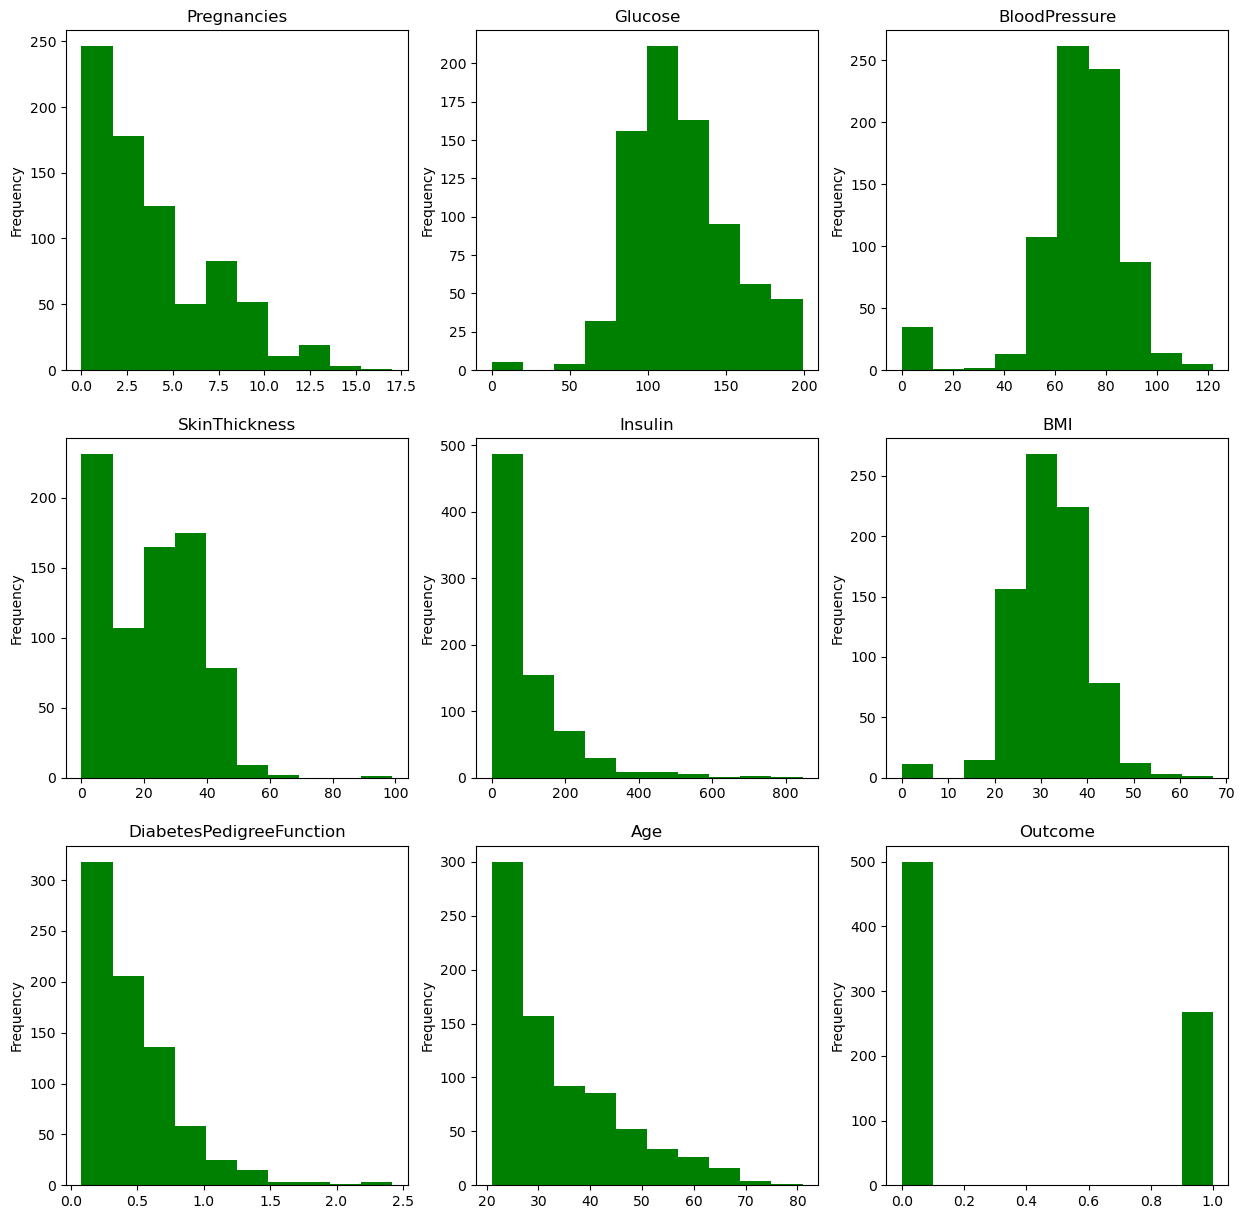

In [7]:
fig,axes=plt.subplots(3,3,figsize=(15,15))

data['Pregnancies'].plot(kind='hist',ax=axes[0,0],color='green')
data['Glucose'].plot(kind='hist',ax=axes[0,1],color='green')
data['BloodPressure'].plot(kind='hist',ax=axes[0,2],color='green')
data['SkinThickness'].plot(kind='hist',ax=axes[1,0],color='green')
data['Insulin'].plot(kind='hist',ax=axes[1,1],color='green')
data['BMI'].plot(kind='hist',ax=axes[1,2],color='green')
data['DiabetesPedigreeFunction'].plot(kind='hist',ax=axes[2,0],color='green')
data['Age'].plot(kind='hist',ax=axes[2,1],color='green')
data['Outcome'].plot(kind='hist',ax=axes[2,2],color='green')

axes[0,0].set_title('Pregnancies')
axes[0,1].set_title('Glucose')
axes[0,2].set_title('BloodPressure')
axes[1,0].set_title('SkinThickness')
axes[1,1].set_title('Insulin')
axes[1,2].set_title('BMI')
axes[2,0].set_title('DiabetesPedigreeFunction')
axes[2,1].set_title('Age')
axes[2,2].set_title('Outcome')

plt.show()

In [8]:
skewness=data.apply(skew)
kurtosis=data.apply(kurtosis)

In [9]:
print('skewness:\n',skewness)
print('_____________________________________')
print('kurtosis:\n',kurtosis)

skewness:
 Pregnancies                 0.899912
Glucose                     0.173414
BloodPressure              -1.840005
SkinThickness               0.109159
Insulin                     2.267810
BMI                        -0.428143
DiabetesPedigreeFunction    1.916159
Age                         1.127389
Outcome                     0.633776
dtype: float64
_____________________________________
kurtosis:
 Pregnancies                 0.150383
Glucose                     0.628813
BloodPressure               5.138691
SkinThickness              -0.524494
Insulin                     7.159575
BMI                         3.261257
DiabetesPedigreeFunction    5.550792
Age                         0.631177
Outcome                    -1.598328
dtype: float64


**- Investigate skewness and kurtosis for each numerical attribute to identify
distribution characteristics.**.

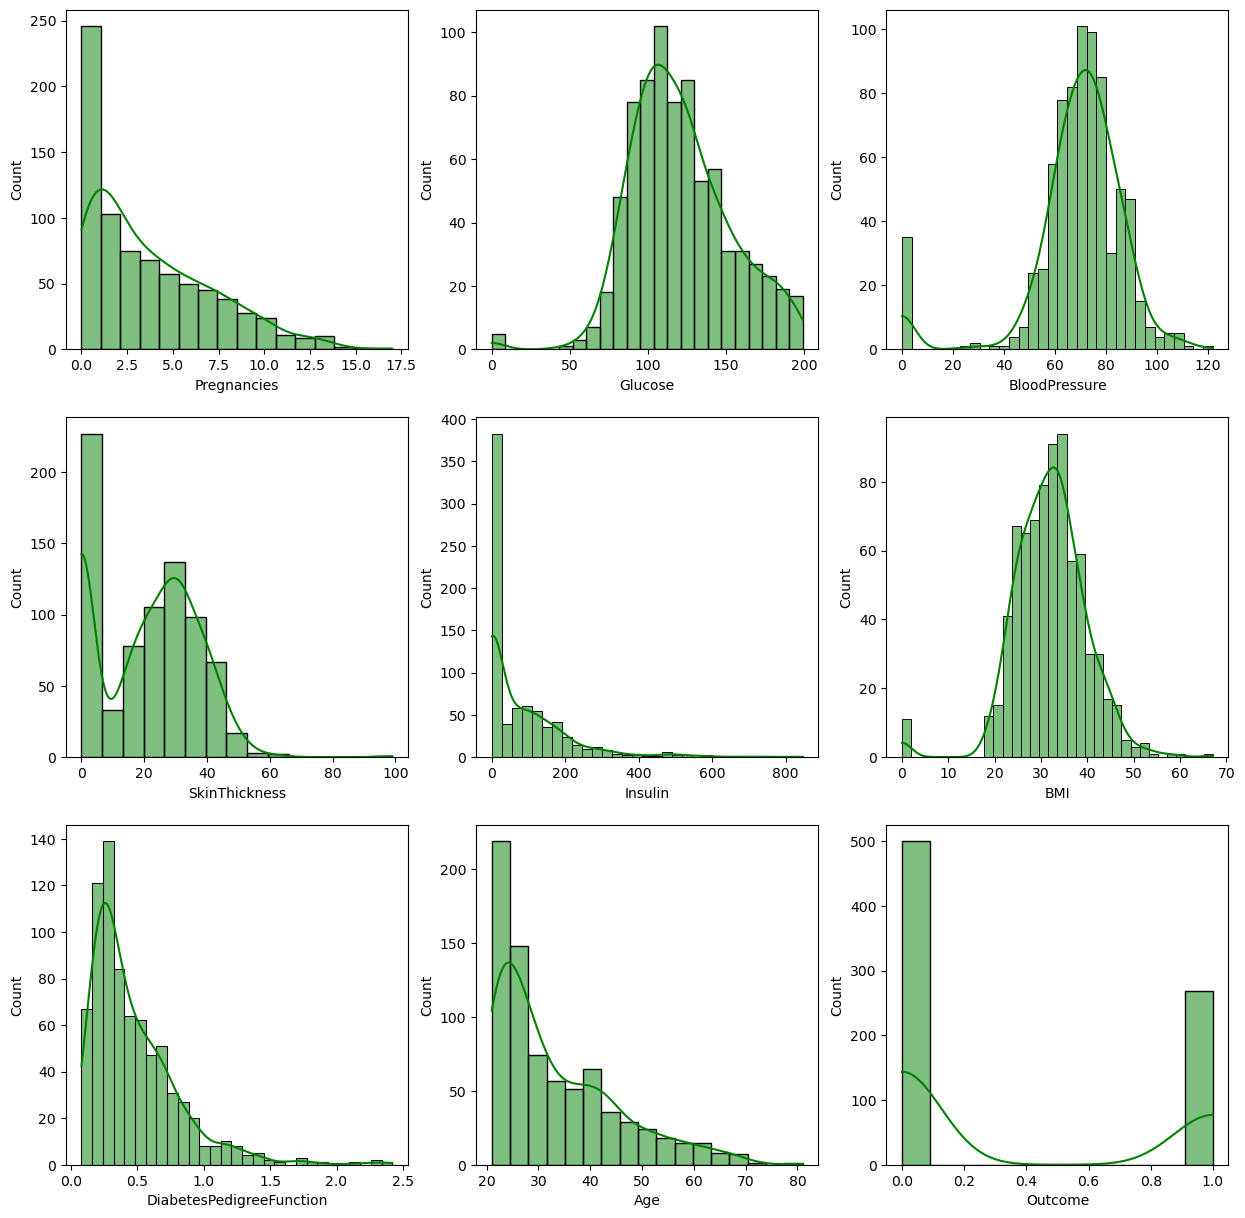

In [10]:
warnings.filterwarnings('ignore')

fig,axes=plt.subplots(3,3,figsize=(15,15))

sns.histplot(data['Pregnancies'],kde=True,ax=axes[0,0],color='green')
sns.histplot(data['Glucose'],kde=True,ax=axes[0,1],color='green')
sns.histplot(data['BloodPressure'],kde=True,ax=axes[0,2],color='green')
sns.histplot(data['SkinThickness'],kde=True,ax=axes[1,0],color='green')
sns.histplot(data['Insulin'],kde=True,ax=axes[1,1],color='green')
sns.histplot(data['BMI'],kde=True,ax=axes[1,2],color='green')
sns.histplot(data['DiabetesPedigreeFunction'],kde=True,ax=axes[2,0],color='green')
sns.histplot(data['Age'],kde=True,ax=axes[2,1],color='green')
sns.histplot(data['Outcome'],kde=True,ax=axes[2,2],color='green')

plt.show()

**- Use pair plots to study pairwise relationships between numerical variables.**

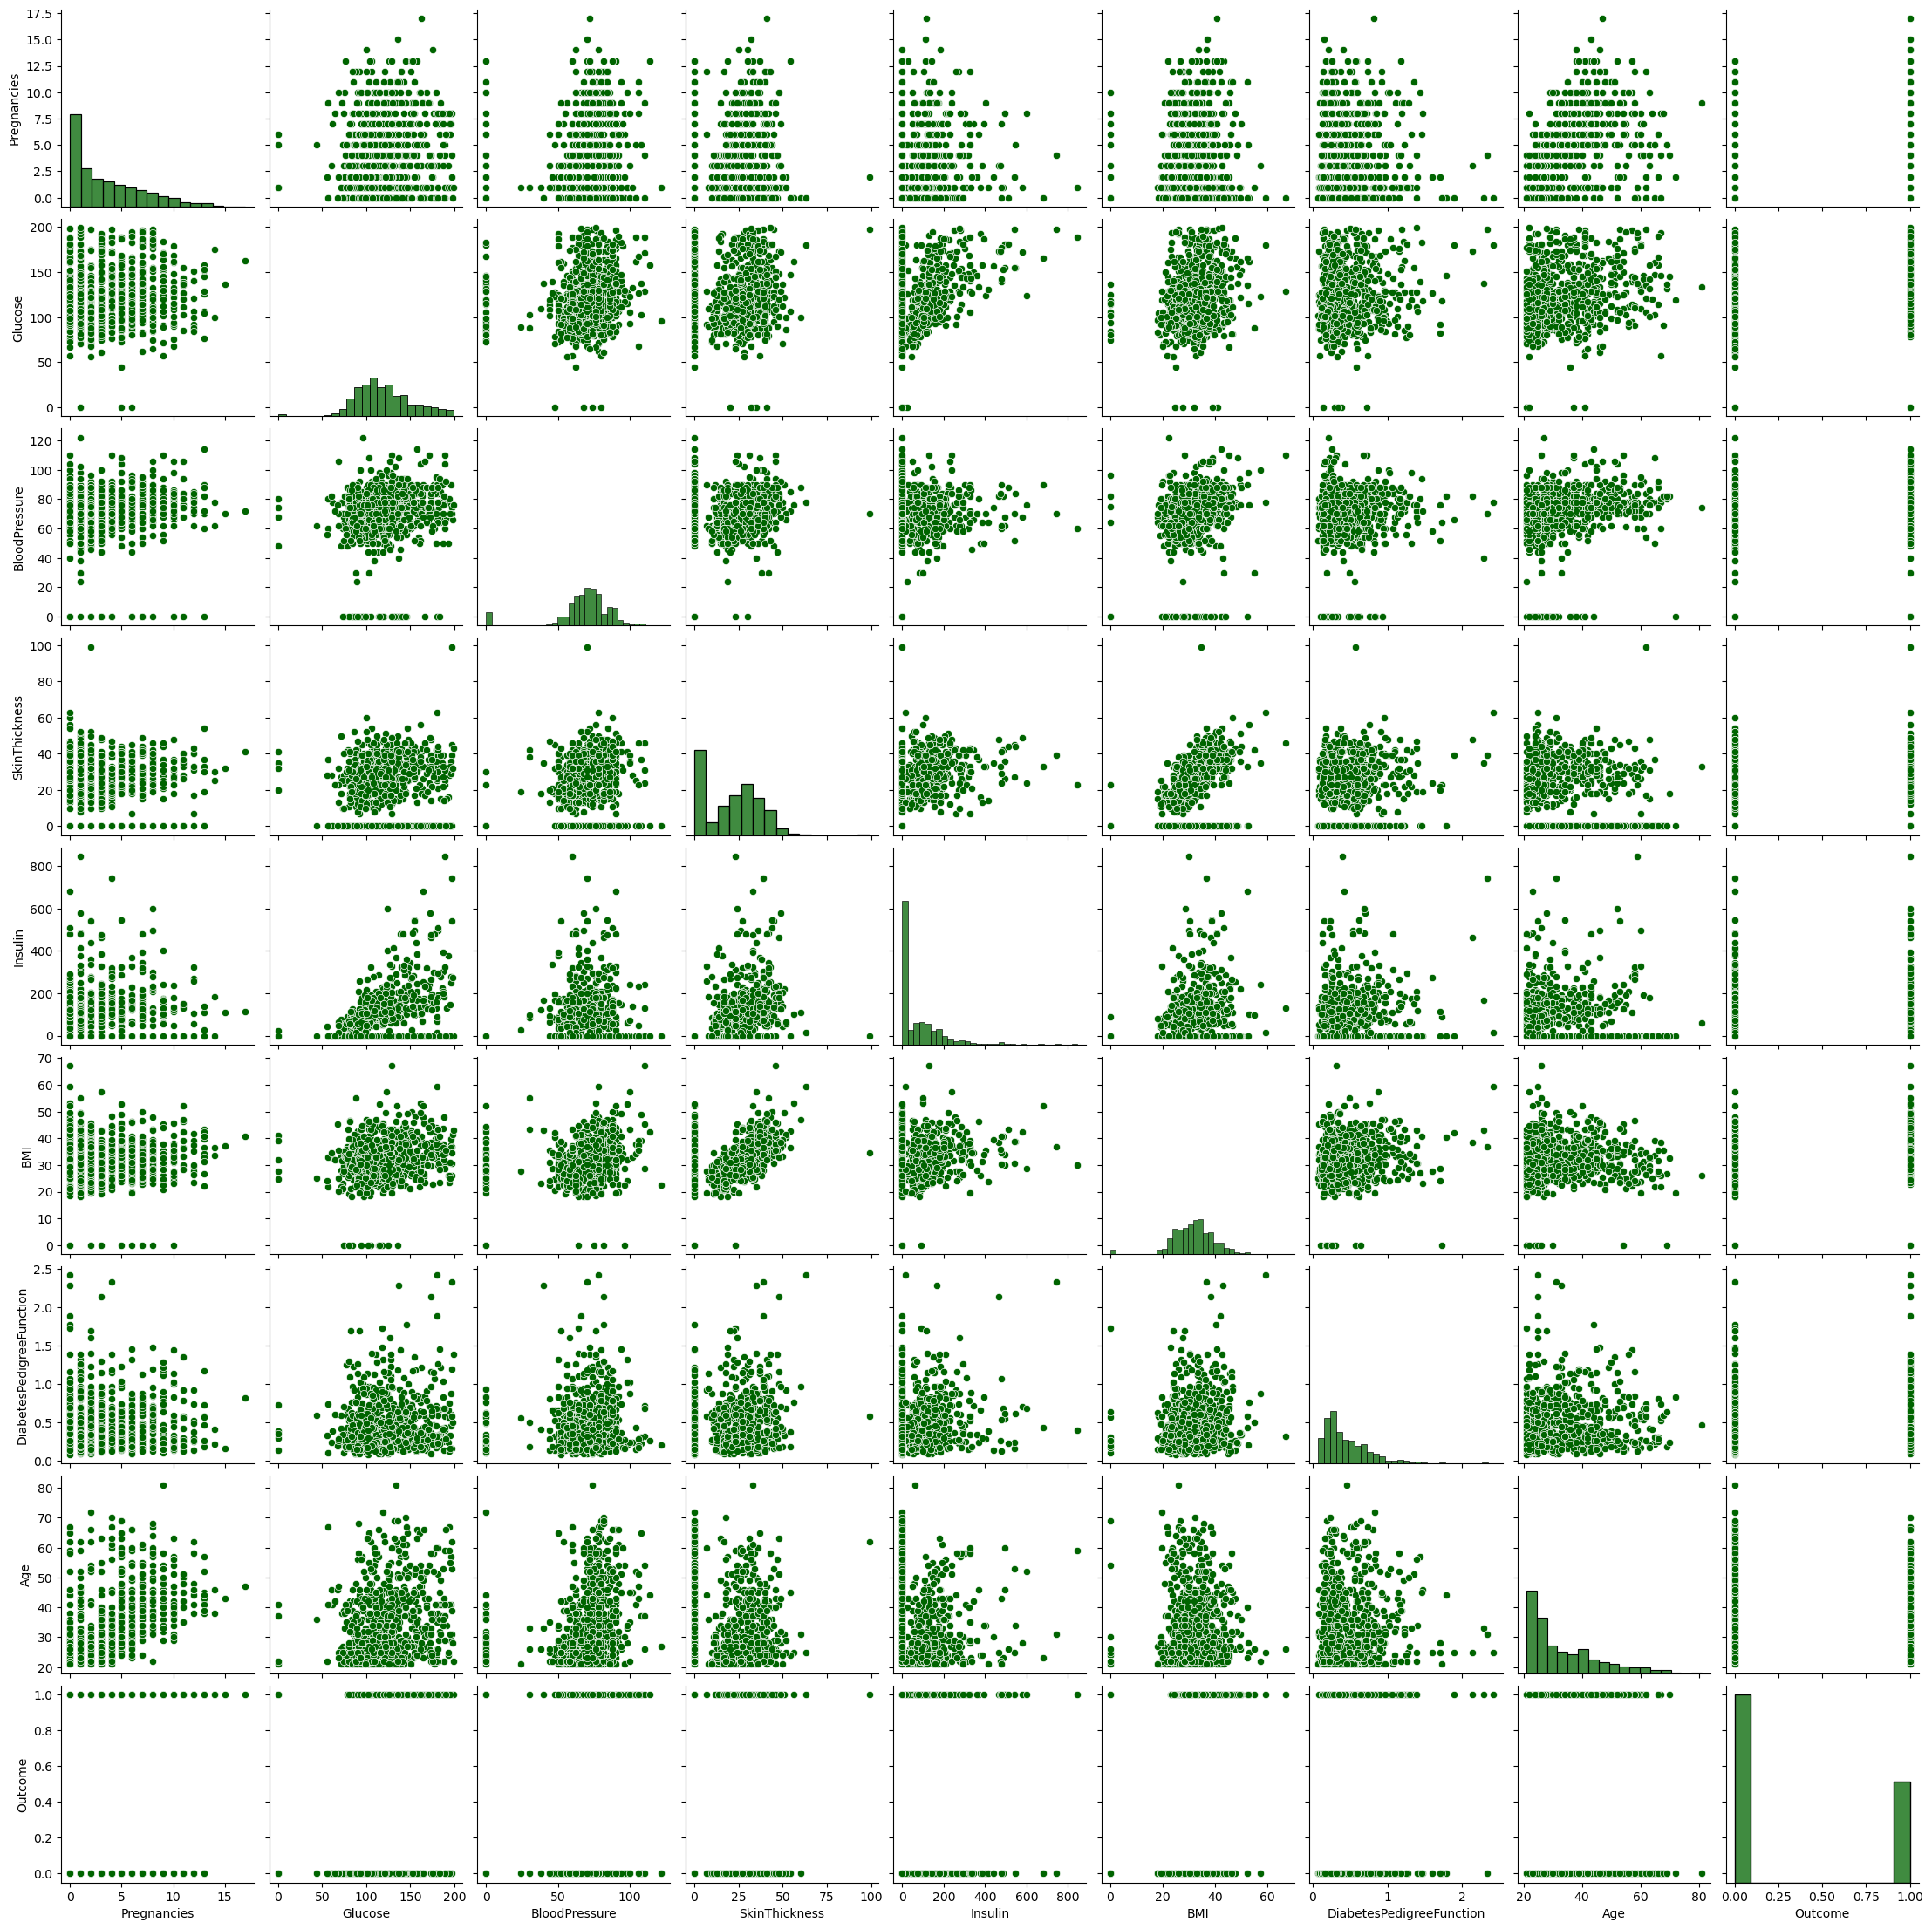

In [11]:
warnings.filterwarnings('ignore')

sns.set_palette(sns.color_palette(["#006400","#228B22","#32CD32","#00FF00"]))
sns.pairplot(data)
plt.show()

**- Plot correlation heatmaps (using Pearson and Spearman correlations) and
interpret highly correlated attributes.**

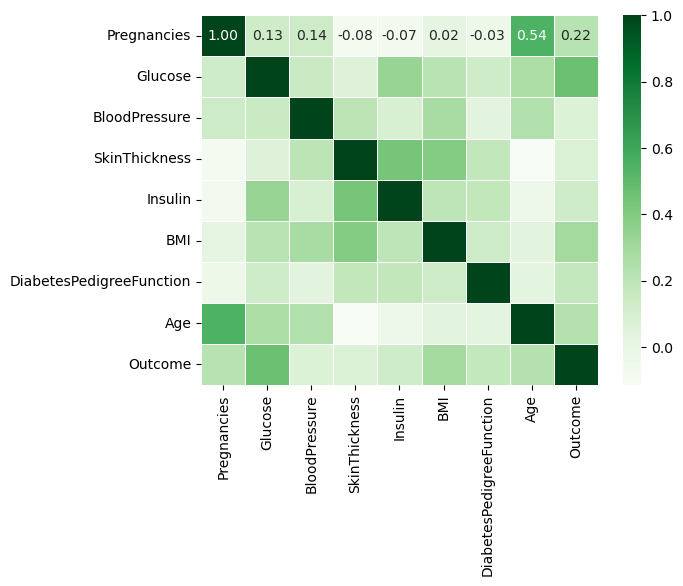

In [13]:
pearson_corr=data.corr(method='pearson')
sns.heatmap(pearson_corr,annot=True,cmap='Greens',fmt=".2f",linewidths=0.5)
plt.show()

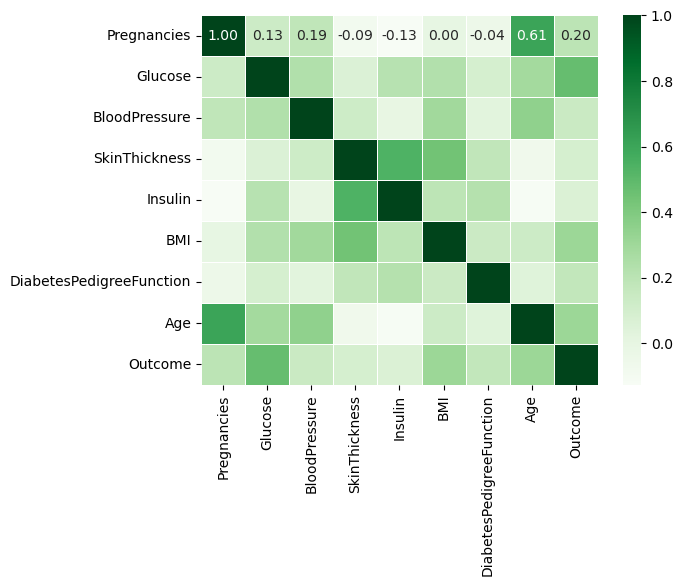

In [14]:
spearman_corr=data.corr(method='spearman')
sns.heatmap(spearman_corr,annot=True,cmap='Greens',fmt=".2f",linewidths=0.5)
plt.show()

#### **3. Outlier Analysis and Feature Relationships:**

**- Identify outliers in attributes such as BMI, Glucose, and Insulin.Use both box plots and the z-score method (set a threshold of 3 standard
deviations).**

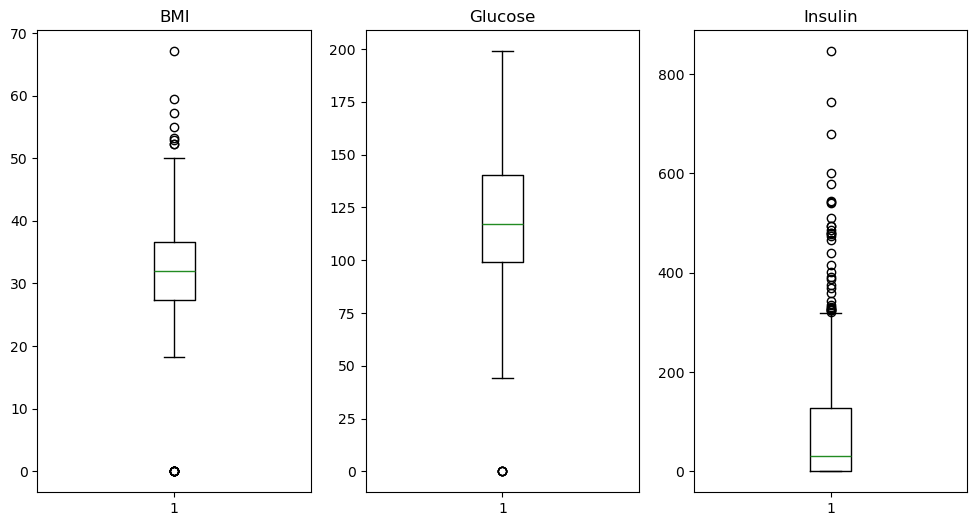

In [15]:
plt.figure(figsize=(12,6))

plt.subplot(1,3,1)
plt.boxplot(data['BMI'])
plt.title('BMI')

plt.subplot(1,3,2)  
plt.boxplot(data['Glucose'])
plt.title('Glucose')

plt.subplot(1,3,3)  
plt.boxplot(data['Insulin'])
plt.title('Insulin')

plt.show()

In [16]:
z_scores_BMI=(data['BMI']-data['BMI'].mean())/data['BMI'].std()
z_scores_Glucose=(data['Glucose']-data['Glucose'].mean())/data['Glucose'].std()
z_scores_Insulin=(data['Insulin']-data['Insulin'].mean())/data['Insulin'].std()

outliers_BMI=data['BMI'][np.abs(z_scores_BMI)>3]
outliers_Glucose=data['Glucose'][np.abs(z_scores_Glucose)>3]
outliers_Insulin=data['Insulin'][np.abs(z_scores_Insulin)>3]

print('outliers BMI:\n',outliers_BMI)
print('_______________________________')
print('outliers Glucose:\n',outliers_Glucose)
print('_______________________________')
print('outliers Insulin:\n',outliers_Insulin)

outliers BMI:
 9       0.0
49      0.0
60      0.0
81      0.0
145     0.0
177    67.1
371     0.0
426     0.0
445    59.4
494     0.0
522     0.0
673    57.3
684     0.0
706     0.0
Name: BMI, dtype: float64
_______________________________
outliers Glucose:
 75     0
182    0
342    0
349    0
502    0
Name: Glucose, dtype: int64
_______________________________
outliers Insulin:
 8      543
13     846
111    495
153    485
186    495
220    478
228    744
247    680
286    545
370    465
409    579
415    474
486    480
584    600
645    440
655    540
695    480
753    510
Name: Insulin, dtype: int64


**- Use scatter plots with regression lines to study relationships (e.g., BMI vs.
Glucose).**

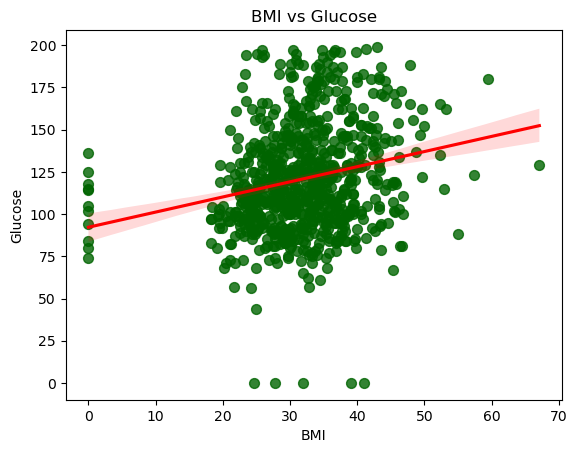

In [17]:
sns.regplot(x='BMI',y='Glucose',data=data,scatter_kws={'s':50},line_kws={'color':'red'})
plt.title('BMI vs Glucose')
plt.show()

In [18]:
BMI_Glucose=data.groupby('Outcome')[['BMI','Glucose']].mean()
BMI_Glucose

,BMI,Glucose
Outcome,,
0,30.304200,109.980000
1,35.142537,141.257463


* **<span style="color:green ;">Higher BMI is clearly associated with diabetes, as the average BMI of individuals with diabetes is significantly higher than that of non-diabetic individuals.</span>**<br>

* **<span style="color:green ;">Higher Glucose levels are also strongly linked to diabetes, as the average glucose level of individuals with diabetes is much higher compared to non-diabetic individuals.</span>**<br>

# **Part 2: Data Pre-Processing**
---

#### **1. Binning Techniques:**

**- Apply equi-width binning and equi-depth binning (5 bins) to smooth the values of
the Age and BMI attributes.**

In [19]:
#depth
values_sorted4BMI=np.sort(np.array(data['BMI']))
values_sorted4Age=np.sort(np.array(data['Age']))

In [20]:
boundaries4BMI=np.linspace(0,len(values_sorted4BMI),6,dtype=int)
boundaries4Age=np.linspace(0,len(values_sorted4Age),6,dtype=int)

In [21]:
print('boundaries for BMI: ',boundaries4BMI)
print('boundaries for Age: ',boundaries4Age)

boundaries for BMI:  [  0 153 307 460 614 768]
boundaries for Age:  [  0 153 307 460 614 768]


In [22]:
boundaries4BMI=np.clip(boundaries4BMI,0,len(values_sorted4BMI)-1)
boundaries4Age=np.clip(boundaries4Age,0,len(values_sorted4Age)-1)

In [23]:
intervals4BMI=np.stack([values_sorted4BMI[boundaries4BMI[:-1]], values_sorted4BMI[boundaries4BMI[1:]]],axis=1)
intervals4Age=np.stack([values_sorted4Age[boundaries4Age[:-1]], values_sorted4Age[boundaries4Age[1:]]],axis=1)

In [24]:
print('intervals for BMI:\n',intervals4BMI)
print('intervals for Age:\n',intervals4Age)

intervals for BMI:
 [[ 0.  25.9]
 [25.9 30.1]
 [30.1 33.7]
 [33.7 37.8]
 [37.8 67.1]]
intervals for Age:
 [[21 23]
 [23 27]
 [27 33]
 [33 43]
 [43 81]]


In [25]:
values_sorted4BMI=np.sort(np.array(data['BMI']))
values_sorted4Age=np.sort(np.array(data['Age']))
boundaries4BMI=np.linspace(0,len(values_sorted4BMI),6,dtype=int)
boundaries4Age=np.linspace(0,len(values_sorted4Age),6,dtype=int)
boundaries4BMI=np.clip(boundaries4BMI,0,len(values_sorted4BMI)-1)
boundaries4Age=np.clip(boundaries4Age,0,len(values_sorted4Age)-1)
intervals4BMI=np.stack([values_sorted4BMI[boundaries4BMI[:-1]], values_sorted4BMI[boundaries4BMI[1:]]],axis=1)
intervals4Age=np.stack([values_sorted4Age[boundaries4Age[:-1]], values_sorted4Age[boundaries4Age[1:]]],axis=1)

In [26]:
#width
boundaries4BMI=np.linspace(data['BMI'].min(),data['BMI'].max(),6,dtype=int)
boundaries4Age=np.linspace(data['Age'].min(),data['Age'].max(),6,dtype=int)

In [27]:
print('boundaries for BMI: ',boundaries4BMI)
print('boundaries for Age: ',boundaries4Age)

boundaries for BMI:  [ 0 13 26 40 53 67]
boundaries for Age:  [21 33 45 57 69 81]


In [28]:
boundaries4BMI=np.clip(boundaries4BMI,0,len(values_sorted4BMI)-1)
boundaries4Age=np.clip(boundaries4Age,0,len(values_sorted4Age)-1)

In [29]:
intervals4BMI = np.stack([boundaries4BMI[:-1], boundaries4BMI[1:]], axis=1)
intervals4Age = np.stack([boundaries4Age[:-1], boundaries4Age[1:]], axis=1)

In [30]:
print('intervals for BMI:\n',intervals4BMI)
print('intervals for Age:\n',intervals4Age)

intervals for BMI:
 [[ 0 13]
 [13 26]
 [26 40]
 [40 53]
 [53 67]]
intervals for Age:
 [[21 33]
 [33 45]
 [45 57]
 [57 69]
 [69 81]]


#### **2. Normalization Techniques:**

**- Min-max normalization: Scale values to the range [0.0, 1.0].**

In [31]:
min_max4Glucose=(data['Glucose']-data['Glucose'].min())*(1-0)/(data['Glucose'].max()-data['Glucose'].min())+0
min_max4BMI=(data['BMI']-data['BMI'].min())*(1-0)/(data['BMI'].max()-data['BMI'].min())+0
min_max4BloodPressure=(data['BloodPressure']-data['BloodPressure'].min())*(1-0)/(data['BloodPressure'].max()-data['BloodPressure'].min())+0

In [32]:
print('min_max for Glucose:\n',min_max4Glucose)
print('____________________________________________')
print('min_max for BMI:\n',min_max4BMI)
print('____________________________________________')
print('min_max for BloodPressure:\n',min_max4BloodPressure)

min_max for Glucose:
 0      0.743719
1      0.427136
2      0.919598
3      0.447236
4      0.688442
         ...   
763    0.507538
764    0.613065
765    0.608040
766    0.633166
767    0.467337
Name: Glucose, Length: 768, dtype: float64
____________________________________________
min_max for BMI:
 0      0.500745
1      0.396423
2      0.347243
3      0.418778
4      0.642325
         ...   
763    0.490313
764    0.548435
765    0.390462
766    0.448584
767    0.453055
Name: BMI, Length: 768, dtype: float64
____________________________________________
min_max for BloodPressure:
 0      0.590164
1      0.540984
2      0.524590
3      0.540984
4      0.327869
         ...   
763    0.622951
764    0.573770
765    0.590164
766    0.491803
767    0.573770
Name: BloodPressure, Length: 768, dtype: float64


**- Log transformation: Apply a log transformation to reduce skewness and compare its effect.**

In [33]:
Glucose_log=np.log(data['Glucose']+0.1)
BMI_log=np.log(data['BMI']+0.1)
BloodPressure_log=np.log(data['BloodPressure']+0.1)

In [34]:
print('Log transformation for Glucose:\n',Glucose_log)
print('____________________________________________')
print('Log transformation for BMI:\n',BMI_log)
print('____________________________________________')
print('Log transformation for BloodPressure:\n',BloodPressure_log)

Log transformation for Glucose:
 0      4.997888
1      4.443827
2      5.210032
3      4.489759
4      4.920711
         ...   
763    4.616110
764    4.804840
765    4.796617
766    4.837075
767    4.533674
Name: Glucose, Length: 768, dtype: float64
____________________________________________
Log transformation for BMI:
 0      3.517498
1      3.284664
2      3.152736
3      3.339322
4      3.765840
         ...   
763    3.496508
764    3.608212
765    3.269569
766    3.407842
767    3.417727
Name: BMI, Length: 768, dtype: float64
____________________________________________
Log transformation for BloodPressure:
 0      4.278054
1      4.191169
2      4.160444
3      4.191169
4      3.691376
         ...   
763    4.332048
764    4.249923
765    4.278054
766    4.096010
767    4.249923
Name: BloodPressure, Length: 768, dtype: float64


**- Z-score normalization: Standardize the attributes.**

In [35]:
Glucose_zscore=(data['Glucose']-data['Glucose'].mean())/data['Glucose'].std()
BMI_zscore=(data['BMI']-data['BMI'].mean())/data['BMI'].std()
BloodPressure_zscore=(data['BloodPressure']-data['BloodPressure'].mean())/data['BloodPressure'].std()

In [36]:
print('Z-score normalization for Glucose:\n',Glucose_zscore)
print('____________________________________________')
print('Z-score normalization for BMI:\n',BMI_zscore)
print('____________________________________________')
print('Z-score normalization for BloodPressure:\n',BloodPressure_zscore)

Z-score normalization for Glucose:
 0      0.847771
1     -1.122665
2      1.942458
3     -0.997558
4      0.503727
         ...   
763   -0.622237
764    0.034575
765    0.003299
766    0.159683
767   -0.872451
Name: Glucose, Length: 768, dtype: float64
____________________________________________
Z-score normalization for BMI:
 0      0.203880
1     -0.683976
2     -1.102537
3     -0.493721
4      1.408828
         ...   
763    0.115094
764    0.609757
765   -0.734711
766   -0.240048
767   -0.201997
Name: BMI, Length: 768, dtype: float64
____________________________________________
Z-score normalization for BloodPressure:
 0      0.149543
1     -0.160441
2     -0.263769
3     -0.160441
4     -1.503707
         ...   
763    0.356200
764    0.046215
765    0.149543
766   -0.470426
767    0.046215
Name: BloodPressure, Length: 768, dtype: float64


**- Important: Compare the effectiveness of these normalization techniques using density plots before and after transformation.**

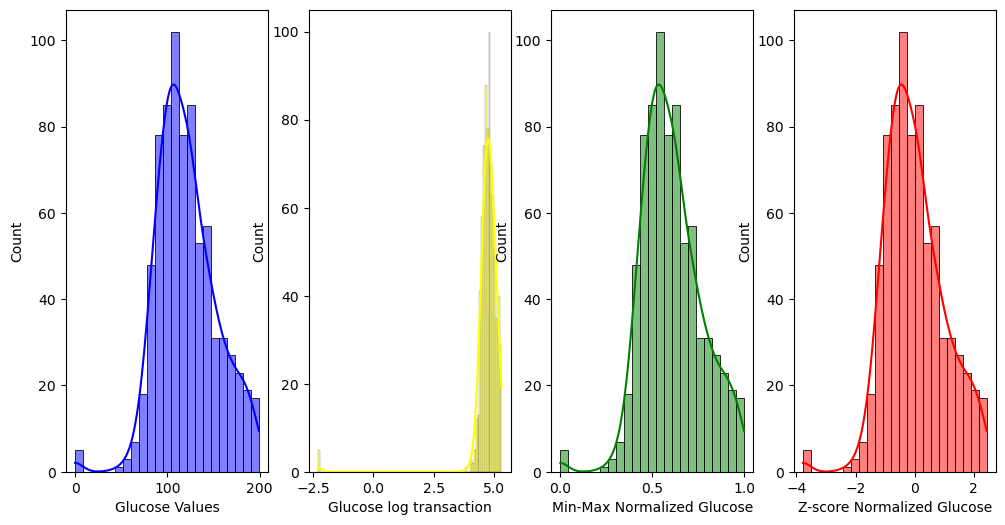

In [37]:
warnings.simplefilter(action='ignore',category=FutureWarning)

fig,axes=plt.subplots(1,4,figsize=(12,6))

sns.histplot(data['Glucose'],kde=True,ax=axes[0],color='blue')
sns.histplot(Glucose_log,kde=True,ax=axes[1],color='yellow')
sns.histplot(min_max4Glucose,kde=True,ax=axes[2],color='green')
sns.histplot(Glucose_zscore,kde=True,ax=axes[3],color='red')

axes[0].set_xlabel('Glucose Values')
axes[1].set_xlabel('Glucose log transaction')
axes[2].set_xlabel('Min-Max Normalized Glucose')
axes[3].set_xlabel('Z-score Normalized Glucose')

plt.show()

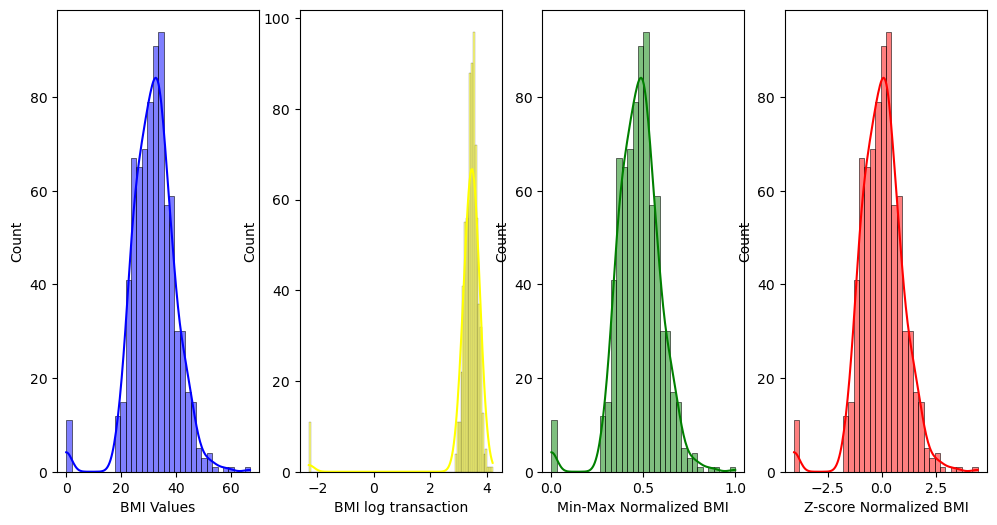

In [38]:
warnings.simplefilter(action='ignore',category=FutureWarning)

fig,axes=plt.subplots(1,4,figsize=(12,6))

sns.histplot(data['BMI'],kde=True,ax=axes[0],color='blue')
sns.histplot(BMI_log,kde=True,ax=axes[1],color='yellow')
sns.histplot(min_max4BMI,kde=True,ax=axes[2],color='green')
sns.histplot(BMI_zscore,kde=True,ax=axes[3],color='red')

axes[0].set_xlabel('BMI Values')
axes[1].set_xlabel('BMI log transaction')
axes[2].set_xlabel('Min-Max Normalized BMI')
axes[3].set_xlabel('Z-score Normalized BMI')

plt.show()

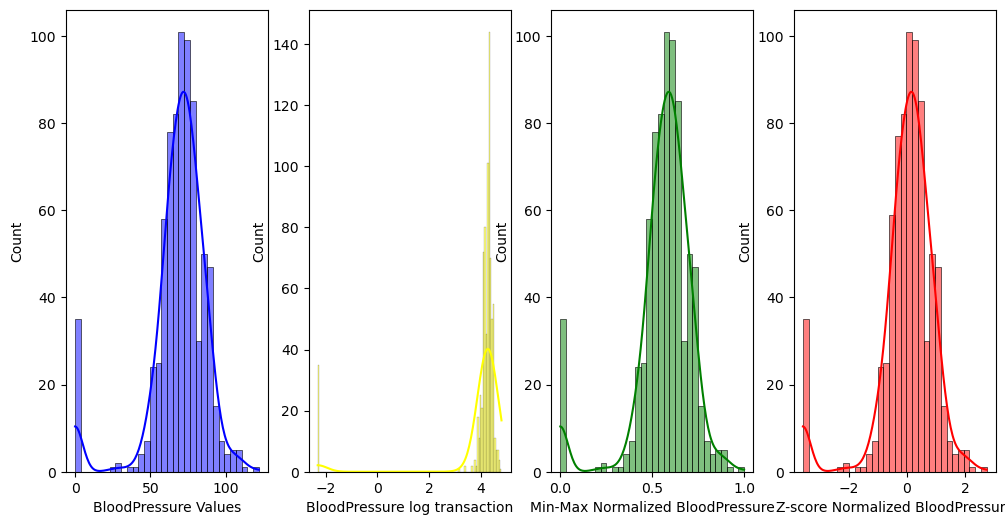

In [39]:
warnings.simplefilter(action='ignore',category=FutureWarning)

fig,axes=plt.subplots(1,4,figsize=(12,6))

sns.histplot(data['BloodPressure'],kde=True,ax=axes[0],color='blue')
sns.histplot(BloodPressure_log,kde=True,ax=axes[1],color='yellow')
sns.histplot(min_max4BloodPressure,kde=True,ax=axes[2],color='green')
sns.histplot(BloodPressure_zscore,kde=True,ax=axes[3],color='red')

axes[0].set_xlabel('BloodPressure Values')
axes[1].set_xlabel('BloodPressure log transaction')
axes[2].set_xlabel('Min-Max Normalized BloodPressure')
axes[3].set_xlabel('Z-score Normalized BloodPressure')

plt.show()

#### **3. Discretization of Age:**

**- Discretize the Age attribute into the following advanced categories based on health
risk levels:(Young (18–30), Low_Risk (31–45), Moderate_Risk (46–60), and High_Risk (61+)).**

In [40]:
data['Age_as_category']=pd.cut(data['Age'],bins=[18,30,45,60,float('inf')],labels=['Young','Low_Risk','Moderate_Risk','High_Risk'],right=True)

**- Calculate and visualize the frequency of each category using a pie chart or bar plot.**

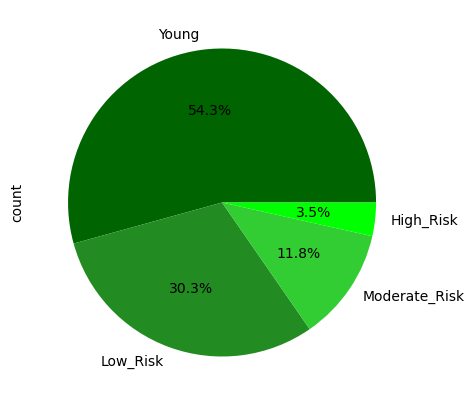

In [41]:
plt.figure(figsize=(5, 5))
data['Age_as_category'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.show()

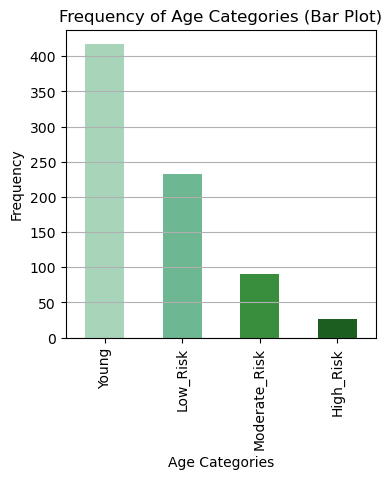

In [42]:
plt.figure(figsize=(4,4))
data['Age_as_category'].value_counts().plot(kind='bar',color=['#a8d5ba','#6db792','#388e3c','#1b5e20'])
plt.title("Frequency of Age Categories (Bar Plot)")
plt.xlabel("Age Categories")
plt.ylabel("Frequency")
plt.grid(axis='y')

#### **4. Handling Missing Data:**

**- Handle missing values in Insulin and SkinThickness attributes using: Mean/Median imputation for missing numerical data.**

In [43]:
print('how many null values Insulin: ',data['Insulin'].isnull().sum())
print('how many null values SkinThickness: ',data['SkinThickness'].isnull().sum())

how many null values Insulin:  0
how many null values SkinThickness:  0


In [44]:
data['Insulin']=data['Insulin'].replace(0,np.nan)
data['SkinThickness']=data['SkinThickness'].replace(0,np.nan)

In [45]:
print('how many null values Insulin: ',data['Insulin'].isnull().sum())
print('how many null values SkinThickness: ',data['SkinThickness'].isnull().sum())

how many null values Insulin:  374
how many null values SkinThickness:  227


In [46]:
Insulin_HM_mean=data['Insulin'].fillna(data['Insulin'].mean())
SkinThickness_HM_mean=data['SkinThickness'].fillna(data['SkinThickness'].mean())

In [47]:
Insulin_HM_median=data['Insulin'].fillna(data['Insulin'].median())
SkinThickness_HM_median=data['SkinThickness'].fillna(data['SkinThickness'].median())

#### **5. Feature Engineering:**

**- Create new features such as: BMI Category (Underweight, Normal, Overweight, Obese based on BM 
ranges).**

In [48]:
data['Insulin']=data['Insulin'].replace(np.nan,0)
data['SkinThickness']=data['SkinThickness'].replace(np.nan,0)

In [49]:
data['BMI Category']=pd.cut(data['BMI'],bins=[0,18.5,24.9,29.9,float('inf')],labels=['Underweight','Normal','Overweight','Obese'])

In [50]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age_as_category,BMI Category
0,6,148,72,35.0,0.0,33.6,0.627,50,1,Moderate_Risk,Obese
1,1,85,66,29.0,0.0,26.6,0.351,31,0,Low_Risk,Overweight
2,8,183,64,0.0,0.0,23.3,0.672,32,1,Low_Risk,Normal
3,1,89,66,23.0,94.0,28.1,0.167,21,0,Young,Overweight
4,0,137,40,35.0,168.0,43.1,2.288,33,1,Low_Risk,Obese


**- Encode BMI Category variables (if applicable in an extended dataset) using One-hot encoding.**

In [51]:
BMI_One_hot=pd.get_dummies(data['BMI Category'],drop_first=False)

In [52]:
data=pd.concat([data,BMI_One_hot],axis=1)

In [53]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age_as_category,BMI Category,Underweight,Normal,Overweight,Obese
0,6,148,72,35.0,0.0,33.6,0.627,50,1,Moderate_Risk,Obese,False,False,False,True
1,1,85,66,29.0,0.0,26.6,0.351,31,0,Low_Risk,Overweight,False,False,True,False
2,8,183,64,0.0,0.0,23.3,0.672,32,1,Low_Risk,Normal,False,True,False,False
3,1,89,66,23.0,94.0,28.1,0.167,21,0,Young,Overweight,False,False,True,False
4,0,137,40,35.0,168.0,43.1,2.288,33,1,Low_Risk,Obese,False,False,False,True


**- Calculate the correlation between Age x BMI to capture combined effects.**

In [54]:
correlation=data['Age'].corr(data['BMI'])

In [55]:
correlation

0.036241870092294105

* **<span style="color:green ;">The correlation value between Age and BMI is 0.036. This indicates a very weak positive relationship between the two features. In practical terms, it suggests that changes in one feature are almost independent of changes in the other. The relationship is so weak that it may not be meaningful or significant in most contexts.</span>**<br>

# **Part 3: Association Rules Mining**
---

#### **1. Extract and Evaluate Associations:**

**- Use association rule mining techniques (Apriori, FP-Growth, ECLAT) in Python to
extract and evaluate possible associations between the attributes.**

In [56]:
df=pd.read_csv(r"C:\Users\Shahed\OneDrive - Hashemite University\mining-1\AR_dataset (1).csv")

In [57]:
basket=df.groupby('Member_number')['itemDescription'].apply(list)

In [58]:
basket

Member_number
1000    [soda, canned beer, sausage, sausage, whole mi...
1001    [frankfurter, frankfurter, beef, sausage, whol...
1002    [tropical fruit, butter milk, butter, frozen v...
1003    [sausage, root vegetables, rolls/buns, deterge...
1004    [other vegetables, pip fruit, root vegetables,...
                              ...                        
4996    [dessert, salty snack, rolls/buns, misc. bever...
4997    [tropical fruit, white wine, whole milk, curd,...
4998                                   [rolls/buns, curd]
4999    [bottled water, butter milk, tropical fruit, b...
5000    [soda, bottled beer, fruit/vegetable juice, ro...
Name: itemDescription, Length: 3898, dtype: object

In [59]:
encoder=TransactionEncoder()
encoder_Transaction=encoder.fit(basket).transform(basket)
df=pd.DataFrame(encoder_Transaction,columns=encoder.columns_)

In [60]:
df

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,True,False,...,False,False,False,True,False,True,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3893,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3894,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,False,False
3895,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3896,False,False,False,False,False,False,False,False,False,True,...,False,False,False,True,False,False,False,False,True,False


In [61]:
freq_itemsets=apriori(df,min_support=0.01,use_colnames=True)

In [62]:
freq_itemsets

,support,itemsets
0,0.015393,(Instant food products)
1,0.078502,(UHT-milk)
2,0.031042,(baking powder)
3,0.119548,(beef)
4,0.079785,(berries)
...,...,...
3011,0.011031,"(whole milk, whipped/sour cream, soda, yogurt)"
3012,0.010518,"(yogurt, other vegetables, whole milk, rolls/b..."
3013,0.013597,"(yogurt, other vegetables, whole milk, rolls/b..."
3014,0.010005,"(yogurt, other vegetables, whole milk, shoppin..."


In [63]:
rules=association_rules(freq_itemsets,metric="confidence",min_threshold=0.5,num_itemsets=2)

In [64]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(UHT-milk),(whole milk),0.078502,0.458184,0.040534,0.516340,1.126928,1.0,0.004565,1.120242,0.122227,0.081696,0.107336,0.302403
1,(beef),(whole milk),0.119548,0.458184,0.064135,0.536481,1.170886,1.0,0.009360,1.168919,0.165762,0.124875,0.144508,0.338229
2,(bottled beer),(whole milk),0.158799,0.458184,0.085428,0.537964,1.174124,1.0,0.012669,1.172672,0.176297,0.160714,0.147247,0.362207
3,(bottled water),(whole milk),0.213699,0.458184,0.112365,0.525810,1.147597,1.0,0.014452,1.142615,0.163569,0.200825,0.124815,0.385526
4,(brown bread),(whole milk),0.135967,0.458184,0.069779,0.513208,1.120091,1.0,0.007481,1.113034,0.124087,0.133072,0.101554,0.332752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1112,"(shopping bags, yogurt, whole milk, other vege...",(rolls/buns),0.017958,0.349666,0.010005,0.557143,1.593355,1.0,0.003726,1.468495,0.379203,0.027977,0.319031,0.292878
1113,"(shopping bags, yogurt, rolls/buns, other vege...",(whole milk),0.014110,0.458184,0.010005,0.709091,1.547613,1.0,0.003540,1.862494,0.358908,0.021643,0.463085,0.365464
1114,"(shopping bags, yogurt, whole milk, rolls/buns)",(other vegetables),0.016932,0.376603,0.010005,0.590909,1.569049,1.0,0.003629,1.523858,0.368918,0.026087,0.343771,0.308738
1115,"(rolls/buns, yogurt, soda, other vegetables)",(whole milk),0.020010,0.458184,0.013597,0.679487,1.483002,1.0,0.004428,1.690467,0.332342,0.029266,0.408447,0.354581


In [65]:
freq_itemsets=fpgrowth(df,min_support=0.01,use_colnames=True)

In [66]:
freq_itemsets

,support,itemsets
0,0.458184,(whole milk)
1,0.313494,(soda)
2,0.282966,(yogurt)
3,0.206003,(sausage)
4,0.177527,(pastry)
...,...,...
3011,0.013340,"(whole milk, seasonal products)"
3012,0.010262,"(rolls/buns, seasonal products)"
3013,0.010005,"(seasonal products, other vegetables)"
3014,0.010005,"(soda, frozen dessert)"


In [67]:
rules=association_rules(freq_itemsets,metric="confidence",min_threshold=0.5,num_itemsets=2)

In [68]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,"(rolls/buns, soda)",(whole milk),0.119805,0.458184,0.065162,0.543897,1.187072,1.0,0.010269,1.187926,0.179041,0.127064,0.158197,0.343057
1,"(rolls/buns, soda, other vegetables)",(whole milk),0.052591,0.458184,0.031811,0.604878,1.320165,1.0,0.007715,1.371264,0.255981,0.066417,0.270746,0.337153
2,"(soda, other vegetables)",(whole milk),0.124166,0.458184,0.069266,0.557851,1.217528,1.0,0.012375,1.225416,0.203992,0.135000,0.183951,0.354514
3,(yogurt),(whole milk),0.282966,0.458184,0.150590,0.532185,1.161510,1.0,0.020940,1.158185,0.193926,0.254996,0.136580,0.430426
4,"(yogurt, soda)",(whole milk),0.097486,0.458184,0.054387,0.557895,1.217622,1.0,0.009720,1.225537,0.198033,0.108495,0.184031,0.338298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1112,(dog food),(whole milk),0.017188,0.458184,0.010005,0.582090,1.270428,1.0,0.002130,1.296489,0.216587,0.021499,0.228686,0.301963
1113,(spread cheese),(whole milk),0.025141,0.458184,0.014366,0.571429,1.247160,1.0,0.002847,1.264238,0.203289,0.030635,0.209010,0.301392
1114,(canned vegetables),(whole milk),0.020523,0.458184,0.011544,0.562500,1.227674,1.0,0.002141,1.238437,0.189337,0.024712,0.192531,0.293848
1115,(seasonal products),(whole milk),0.025911,0.458184,0.013340,0.514851,1.123679,1.0,0.001468,1.116805,0.112994,0.028338,0.104589,0.271983


In [69]:
item_support=df.sum(axis=0)/df.shape[0]

In [74]:
min_support=0.01
frequent_items=item_support[item_support >= min_support]

In [75]:
item_indices=np.arange(len(frequent_items))
pair_indices=np.triu_indices(len(item_indices), k=1)
item_pairs=np.column_stack(pair_indices)

In [78]:
transaction_array=df.to_numpy()

In [80]:
pair_support=np.sum(
    transaction_array[:,item_pairs[:,0]] & transaction_array[:,item_pairs[:,1]], 
    axis=0
)/df.shape[0]

In [81]:
pair_confidence=pair_support/item_support.iloc[item_pairs[:,0]]

In [82]:
frequent_pairs = pd.DataFrame({
    "item1":frequent_items.index[item_pairs[:,0]],
    "item2":frequent_items.index[item_pairs[:,1]],
    "support":pair_support,
    "confidence":pair_confidence
})

In [83]:
frequent_pairs=frequent_pairs[frequent_pairs["support"]>=min_support]

In [84]:
frequent_items

Instant food products    0.015393
UHT-milk                 0.078502
baking powder            0.031042
beef                     0.119548
berries                  0.079785
                           ...   
white bread              0.088763
white wine               0.044125
whole milk               0.458184
yogurt                   0.282966
zwieback                 0.015393
Length: 116, dtype: float64

In [85]:
min_confidence=0.5
rules=frequent_pairs[frequent_pairs["confidence"]>=min_confidence]

In [86]:
rules

,item1,item2,support,confidence
cat food,cling film/bags,spices,0.024115,0.549708
condensed milk,domestic eggs,spices,0.012314,0.516129


#### **2. Explain Selected Rules:**

**- Examine and interpret the most significant rules identified, focusing on those with
high confidence and other relevant correlation measures.**

**<span style="color:green ;">Let’s analyze some of the important rules extracted from Apriori, FP-Growth, and ECLAT based on Confidence, Support:</span>**<br>

<span style="background-color: lightgreen; padding: 3px;">From Apriori Algorithm:</span>
* **<span style="color:green ;">Rule:</span>**<br>
**<span style="color:green ;">     -Antecedent: (meat, domestic eggs)</span>**<br>
**<span style="color:green ;">     -Consequent: (whole milk)</span>**<br>	
**<span style="color:green ;">     -Confidence: 78.43%</span>**<br>
**<span style="color:green ;">     -Support: 10.26%</span>**<br>
**<span style="color:green ;">     -Interpretation: This rule indicates that people who buy meat and domestic eggs have a 78.43% chance of also buying whole milk.</span>**<br>

<span style="background-color: lightgreen; padding: 3px;">From FP-Growth Algorithm:</span>
* **<span style="color:green ;">Rule:</span>**<br>
**<span style="color:green ;">     -Antecedent: (meat, domestic eggs)</span>**<br>
**<span style="color:green ;">     -Consequent: (whole milk)</span>**<br>	
**<span style="color:green ;">     -Confidence: 78.43%</span>**<br>
**<span style="color:green ;">     -Support: 10.26%</span>**<br>
**<span style="color:green ;">     -Interpretation: People who buy meat and domestic eggs have a 78.43% chance of also buying whole milk.</span>**<br>

<span style="background-color: lightgreen; padding: 3px;">From ECLAT Algorithm:</span>
* **<span style="color:green ;">Rule:</span>**<br>
**<span style="color:green ;">     -Antecedent: (cat food)</span>**<br>
**<span style="color:green ;">     -Consequent: (cling film/bags)</span>**<br>
**<span style="color:green ;">     -Confidence: 54.97%</span>**<br>
**<span style="color:green ;">     -Support: 2.41%</span>**<br>
**<span style="color:green ;">     -Interpretation: People who buy cat food have a 54.97% chance of buying cling film/bags as well.</span>**<br>

**- Compare the outcomes from the different association rule mining techniques (e.g.,
Apriori, FP-Growth, ECLAT) to determine if they yield similar or different rules.**

* **<span style="color:green ;">The rules extracted by both Apriori and FP-Growth algorithms were largely similar, especially in terms of Support and Confidence values for certain rules.
For example, the rule Antecedent: (meat, domestic eggs) -> Consequent: (whole milk) in both Apriori and FP-Growth had the same Confidence of 78.43% and Support of 10.26%.</span>**<br>
* **<span style="color:green ;">However, it’s important to note that while many rules were the same between the two algorithms, they also identified other rules that differed between them. This suggests that despite the overlap, there are instances where each algorithm brings unique insights into the dataset based on its underlying mechanics.</span>**<br>

* **<span style="color:green ;">Apriori and FP-Growth are useful for scenarios where we are looking for commonly found associations, and both can be used interchangeably when the computational power is not a concern (since Apriori can be slower on large datasets).</span>**<br>

* **<span style="color:green ;">ECLAT, being more efficient with large datasets, might uncover additional insights and rare associations that could be valuable in specific use cases, like product placement or promotions for less commonly purchased items.</span>**<br>


**- Discuss the potential implications of these rules for or business applications like
product placement, promotions, how these insights might inform strategies or
decision-making.**

* **<span style="color:green ;">Understanding Customer Behavior: By analyzing association rules, businesses can identify which products are often purchased together. For example, if the rule (meat, domestic eggs) -> (whole milk) shows high confidence, it implies that customers who purchase meat and eggs are also likely to buy whole milk. This insight can guide store layout decisions, placing these products close to each other to encourage cross-selling and increase the likelihood of these items being bought together.</span>**<br>

* **<span style="color:green ;">Optimizing Shelf Space: Based on frequent item pairs like (cat food) -> (cling film/bags), products that are often bought together can be placed next to each other, enhancing customer convenience and increasing sales.</span>**<br>

* **<span style="color:green ;">Targeted Promotions: The insights derived from high-confidence association rules can be used to create targeted promotions. For example, if customers who buy soda and rolls/buns are highly likely to purchase whole milk, businesses can offer discounts or bundle deals on these items. This would increase the likelihood of customers buying more products, thus boosting sales.</span>**<br>

* **<span style="color:green ;">Personalized Offers: By identifying associations, companies can create personalized offers for customers based on their shopping behavior. For example, if a customer frequently buys cat food, the business might offer a special discount on cling film/bags as part of a promotional offer tailored to this customer’s shopping habits.</span>**<br>

* **<span style="color:green ;">Demand Forecasting: The insights gained from association rule mining can help businesses forecast demand for certain products based on the associations between them. If two items are frequently bought together, businesses can better plan for inventory needs and ensure they stock adequate quantities of both items.</span>**<br>

* **<span style="color:green ;">Efficient Stocking: Knowing which items are often bought together can also inform restocking decisions. For example, if meat and domestic eggs are frequently purchased together, a store might prioritize restocking these items simultaneously to meet customer demand and avoid stockouts.</span>**<br>

* **<span style="color:green ;">Optimizing Product Line: By analyzing frequent patterns and customer preferences, businesses can expand their product lines in areas that are likely to complement each other. For example, if certain products like soda and whole milk frequently appear together, a business might introduce a new product in this category that appeals to this customer base.</span>**<br>

* **<span style="color:green ;">Cross-Channel Strategy: The association rules can also guide decision-making for businesses that operate both online and offline. Understanding how products are purchased together in physical stores can be used to optimize online recommendations or advertisements, helping businesses target customers with personalized suggestions on digital platforms.</span>**<br>

* **<span style="color:green ;">Better Understanding of Customer Preferences: By analyzing association rules, businesses can gain deeper insights into customer preferences, behaviors, and buying patterns. This knowledge can help companies design products, services, and marketing strategies that better meet customer needs.</span>**<br>

* **<span style="color:green ;">Loyalty Programs: The rules can also inform the design of loyalty programs. For instance, offering loyalty points or rewards for purchasing frequently associated products can enhance customer retention and increase sales.</span>**<br>

# **THANK YOU** ..